# Custom Indicator Example

In [26]:
import yfinance as yf

from mplchart.utils import get_info
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, OHLC, Volume, LinePlot


In [27]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = prices.rename(columns=str.lower).rename_axis(index=str.lower)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2021-03-01 00:00:00-05:00 to 2026-02-27 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          1256 non-null   float64
 1   high          1256 non-null   float64
 2   low           1256 non-null   float64
 3   close         1256 non-null   float64
 4   volume        1256 non-null   int64  
 5   dividends     1256 non-null   float64
 6   stock splits  1256 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.5 KB


In [34]:
from mplchart.model import Indicator
from mplchart.library import calc_ema

class DEMA(Indicator):
    """Double Exponential Moving Average"""

    same_scale = True

    def __init__(self, period: int = 20):
        self.period = period

    def __call__(self, prices):
        series = self.get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2



In [35]:
dema20 = DEMA(20)
dema20


DEMA(20)

In [36]:
res = DEMA(20)(prices)
res.tail()

date
2026-02-23 00:00:00-05:00    265.400832
2026-02-24 00:00:00-05:00    266.657231
2026-02-25 00:00:00-05:00    268.114580
2026-02-26 00:00:00-05:00    269.130826
2026-02-27 00:00:00-05:00    268.406428
Name: close, dtype: float64

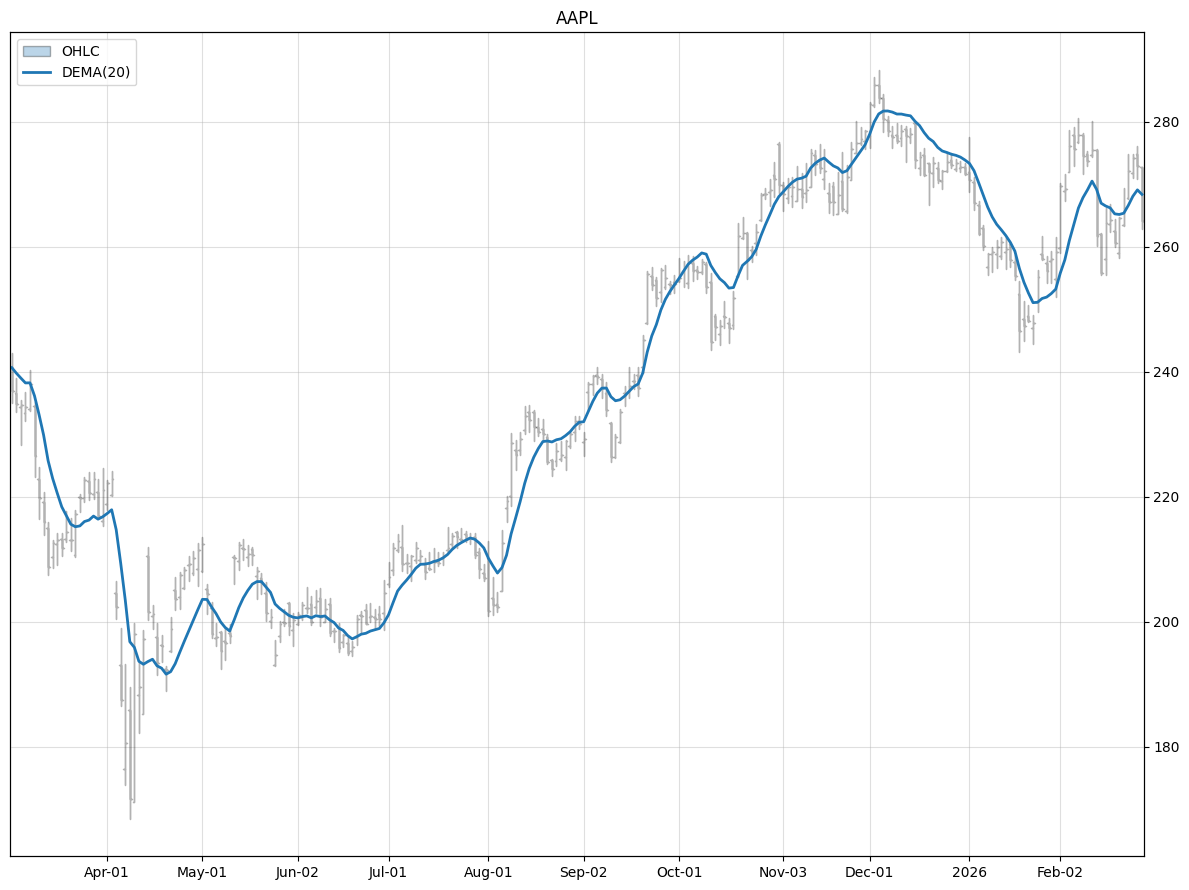

In [37]:
max_bars = 250

indicators = [
    OHLC(alpha=0.3),
    DEMA(20) | LinePlot(width=2),
]

Chart(prices, title=ticker, max_bars=max_bars).plot(indicators).show()
